In [1]:
import streamlit as st
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
product=pd.read_csv("C:/Users/HP/digipython/Major_project/.streamlit/vivo_reviews.csv")
product.tail()

,Unnamed: 0,title,date,content,verified_product,rating
224,224,Jijo m.,2022-03-21,Very sad about your service. After three days ...,Verified Purchase,1
225,225,Arif khan balrampur,2022-04-10,Finger print very good work battery life good ...,Verified Purchase,5
226,226,Amazon Customer,2022-03-23,Good working and nice mobile,Verified Purchase,5
227,227,Karun Kumar sharma,2022-03-31,Mobile damage aaya h,Verified Purchase,1
228,228,manivannan j,2022-03-27,Super battery good camera ok,Verified Purchase,4


In [3]:
from textblob import TextBlob
plt.style.use('ggplot')

In [4]:
def get_sentiment_data(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        p = [sentence.polarity for sentence in blob.sentences] 
        return p
    else:
        return np.nan
def get_review_sentiment(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        p = [sentence.polarity for sentence in blob.sentences] 
        pavg = sum(p)/len(p)
        return pavg
    else:
        return np.nan
def get_review_subjectivity(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        s = [sentence.subjectivity for sentence in blob.sentences] 
        savg = sum(s)/len(s)
        return savg
    else:
        return np.nan

def get_review_sentence_count(sentence):
    if isinstance(sentence,str):
        return len(sentence.split())
    return 0

def get_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "nuetral"


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        227 non-null    int64 
 1   title             227 non-null    object
 2   date              227 non-null    object
 3   content           214 non-null    object
 4   verified_product  193 non-null    object
 5   rating            227 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 10.8+ KB


In [6]:
product['sentence_wise_sentiment']=product.content.apply(get_sentiment_data)
product['review_sentiment']=product.content.apply(get_review_sentiment)
product['review_subjectivity']=product.content.apply(get_review_subjectivity)
product['sentence_count']=product.content.apply(get_review_sentence_count)
product['sentiment']=product.review_sentiment.apply(get_sentiment)
product.head(2)


,Unnamed: 0,title,date,content,verified_product,rating,sentence_wise_sentiment,review_sentiment,review_subjectivity,sentence_count,sentiment
0,0,ANDISAMY C,2021-09-11,கேமரா வேஸ்ட் .தயவு செய்து பணத்தை வேஸ்ட் பன்னாத...,Verified Purchase,1,[0.0],0.00,0.000000,10,nuetral
1,1,RATHOD VIRENDRASINH,2021-09-07,Play Video\n Bad results of camera it is accep...,Verified Purchase,4,"[-0.6999999999999998, 0.0, 0.0, 0.05, 0.2]",-0.09,0.183333,28,negative


In [7]:
pie_out = product.sentiment.value_counts().reset_index()
px.pie(pie_out,names='index',values='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

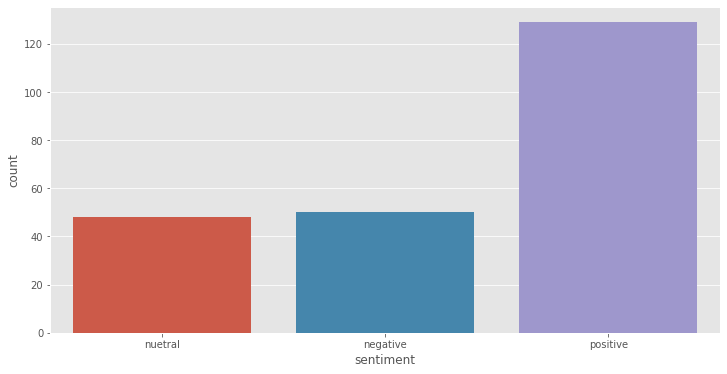

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=product)


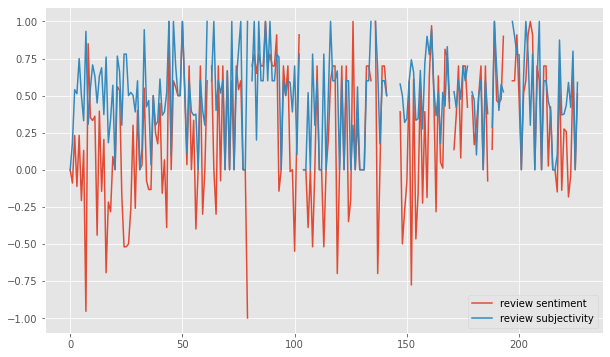

In [9]:
plt.figure(figsize=(10,6))
plt.plot(product['review_sentiment'], label='review sentiment')
plt.plot(product['review_subjectivity'], label='review subjectivity')
plt.legend()
plt.show()

Text(0, 0.5, 'Number of Reviews')

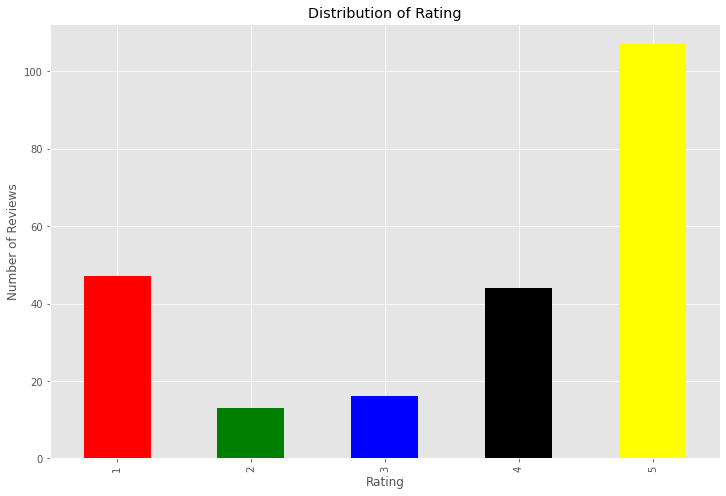

In [10]:
plt.figure(figsize=(12,8))
my_colors = ('red','green','blue','black','yellow') 
product['rating'].value_counts().sort_index().plot(kind='bar',color=my_colors)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [11]:
total = len(product)
print ("Number of reviews: ",total)
print ()

Number of reviews:  227



In [12]:
total_rating = product.groupby('rating').size()
total_rating

rating
1     47
2     13
3     16
4     44
5    107
dtype: int64

In [13]:
total_sentiment = product.groupby('sentiment').size()
total_sentiment

sentiment
negative     50
nuetral      48
positive    129
dtype: int64

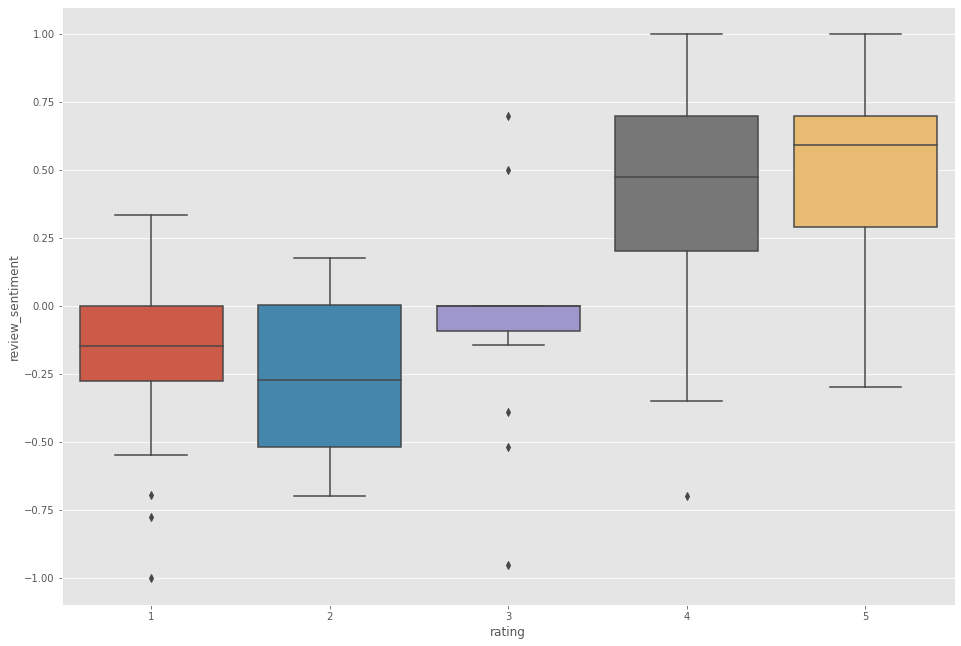

In [14]:
plt.figure(figsize=(16,11))
sns.boxplot(x='rating', y='review_sentiment', data=product)
plt.show()

In [15]:
background_color = 'White'
fig = px.scatter(product, x ='review_sentiment',y='review_subjectivity')
fig.update_layout(
        plot_bgcolor=background_color)
fig.show()

In [16]:
background_color = 'Green'
fig = px.histogram(product, x ='review_sentiment',y='review_subjectivity')
fig.update_layout(
        plot_bgcolor=background_color)
fig.show()